# 0502 In-class Assignment
## Kirsten Arnold

### Problem 1

Array: 
[[ 1  2  3  4  5  6  7  8  9]
 [11 12 13 14 15 16 17 18 19]]  subset=4
Moving averages array:
[[ 2.5  3.5  4.5  5.5  6.5  7.5]
 [12.5 13.5 14.5 15.5 16.5 17.5]]
Array: 
[[45 23  6 34 68]
 [ 7  4  7  8  6]
 [ 6 45  4  3  7]
 [ 7  5  3  6  2]]  subset=5
Moving averages array:
[[34.  14.5 20.  51. ]
 [ 5.5  5.5  7.5  7. ]
 [25.5 24.5  3.5  5. ]
 [ 6.   4.   4.5  4. ]]
Array: 
[[24  6  8  6 45  2  3  7]
 [87 29 58  3 -2  7 32 76]
 [82  1 77  3  5 86  2 45]]  subset=3
Moving averages array:
[[12.67  6.67 19.67 17.67 16.67  4.  ]
 [58.   30.   19.67  2.67 12.33 38.33]
 [53.33 27.   28.33 31.33 31.   44.33]]



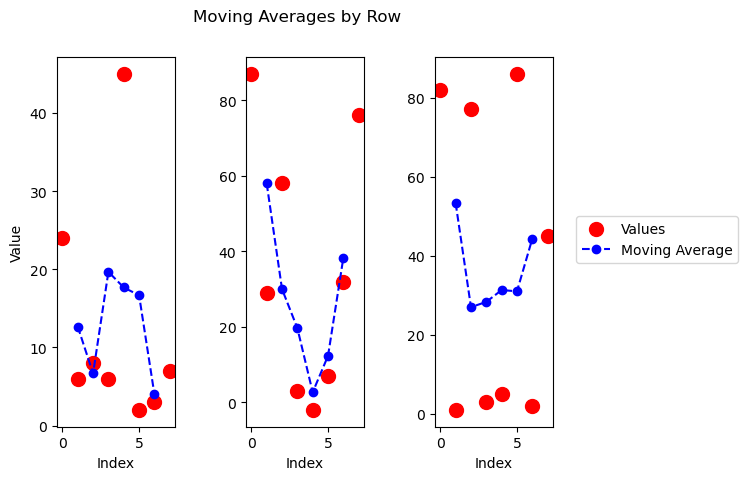

In [96]:
#1 (50%). Given a series of numbers (e.g., a NumPy array) and a fixed subset size, 
#a moving average is to compute the average of number values over the subset. 
#For example, if an input NumPy array is [1,2,3,4,5,6,7,8,9] and the subset size is 4, 
#then the moving average values should be [2.5, 3.5, 4.5, 5.5, 6.5, 7.5]. 

#Please write a function to take as input a two-dimensional NumPy array, 
#calculate the moving average for each row, and 
#return the moving average values as another two-dimensional NumPy array. 

#Assume that the input two-dimensional NumPy array has 3 rows and at least 2 columns, 
#and the subset size is not greater than the number of columns. 
#In addition, please write another function to create a figure containing 
#3 subplots and then plot each row of the input array and its moving average values in one subplot. 

#In addition to the functions, please write some code to test your functions.

import numpy as np
import matplotlib.pyplot as plt

def moving_average(np_array,subset_size):
    '''
    Given a 2D numpy array and a subset size,
    Returns a 2D numpy array of the moving average of numbers for the subsets within each row.
    '''
    #create empty array of zeros for future replacement
    moving_average_array = np.empty((np_array.shape[0],np_array.shape[1]-subset_size+1))
    
    #for each row index in the given array
    for row in range(np_array.shape[0]):
        #for each index in that row up until the beginning of the last possible subset
        for index in range(np_array.shape[1]-subset_size+1):
            #replace the new moving average array 'coordinates' with the subset average (rounded to 2 decimals)
            moving_average_array[row,index] = round(np.mean(np_array[row][index:index+subset_size]),2)
    return moving_average_array

def moving_average_plot(np_array,subset_size):
    '''
    Given a 2D array with 3 rows and a subset size,
    makes a scatterplot of the original array's values and
    plots the moving average as a dotted line.
    Each row of the original array gets its own subplot. 
    '''
    #Make space for subplots (1 subplot tall, 3 subplots wide)
    fig, axes = plt.subplots(1,3)
    
    #make a numpy array for the range(0,#columns) for the x axis for original array plots
    data_x = np.arange(np_array.shape[1])
    
    #make a numpy array for the moving average x axis
    data_x_ave = np.empty((np_array.shape[1]-subset_size+1)) #create an empty array for moving avg x-axis
    for index in np.arange(np_array.shape[1]-subset_size+1):
        data_x_ave[index] = np.mean(data_x[index:index+subset_size]) #fill in moving averages for x-axis
    data_y1 = np_array[0]                                   #row 1 values from original array
    data_y1_ave = moving_average(np_array,subset_size)[0]   #row 1 moving averages
    data_y2 = np_array[1]                                   #row 2 values from original array
    data_y2_ave = moving_average(np_array,subset_size)[1]   #row 2 moving averages
    data_y3 = np_array[2]                                   #row 3 values from original array
    data_y3_ave = moving_average(np_array,subset_size)[2]   #row 3 moving averages
    
    #######Plot the subplots#######
    #Scatterplots are for original array values
    #Line plots are for moving averages
    
    #Row 1 subplot
    axes[0].scatter(data_x, data_y1, c='red',s=100,label='Values')
    axes[0].plot(data_x_ave, data_y1_ave, c='blue',linestyle='--',marker='o',label='Moving Average')
    #Row 2 subplot
    axes[1].scatter(data_x, data_y2, c='red',s=100,label='Values')
    axes[1].plot(data_x_ave, data_y2_ave, c='blue',linestyle='--',marker='o',label='Moving Average')
    #Row 3 subplot
    axes[2].scatter(data_x, data_y3, c='red',s=100,label='Values')
    axes[2].plot(data_x_ave, data_y3_ave, c='blue',linestyle='--',marker='o',label='Moving Average')
    #Adjust width between subplots
    plt.subplots_adjust(wspace=0.6)
    #Add figure legend to center right outside of plot
    fig.legend(bbox_to_anchor=(1.2, 0.5),labels=['Values','Moving Average'],loc='center right')
    #Add title for entire figure
    fig.suptitle('Moving Averages by Row')
    axes[0].set_xlabel('Index')
    axes[1].set_xlabel('Index')
    axes[2].set_xlabel('Index')
    axes[0].set_ylabel('Value')
    

arr1 = np.array([[1,2,3,4,5,6,7,8,9],[11,12,13,14,15,16,17,18,19]])
arr2 = np.array([[45,23,6,34,68],[7,4,7,8,6],[6,45,4,3,7],[7,5,3,6,2]])
arr3 = np.array([[24,6,8,6,45,2,3,7],[87,29,58,3,-2,7,32,76],[82,1,77,3,5,86,2,45]])

print(f'Array: \n{arr1}  subset=4')
print(f'Moving averages array:\n{moving_average(arr1,4)}')
print(f'Array: \n{arr2}  subset=5')
print(f'Moving averages array:\n{moving_average(arr2,2)}')
print(f'Array: \n{arr3}  subset=3')
print(f'Moving averages array:\n{moving_average(arr3,3)}')
print()
moving_average_plot(arr3,3)

### Problem 2

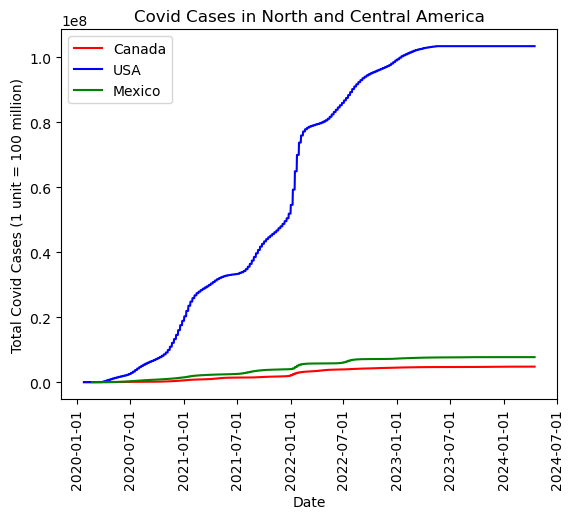

In [97]:
#2 (50%). Please write a Python program to read the COVID-19 data from the file, owid-covid-data.csv 
#Download owid-covid-data.csv, and 
#generate a plot containing three curves for the 
#total COVID-19 cases in USA, Canada and Mexico, one per each. 
#In the csv file, the first column corresponds to three-letter country codes, 
#e.g., ‘USA’, ‘CAN’ and ‘MEX’ represent United States of America, Canada and Mexico, respectively. 
#The fifth column shows the number of total COVID-19 cases. 
#The first row is the header of the file, and 
#each of the rest rows represents the COVID-19 data of a specific date for a specific country. 
#Your program needs to plot the number of the total COVID-19 cases for the three countries 
#with respect to the dates, 
#e.g., the x-axis for the dates and 
#the y-axis for the number of total cases. 
#Please plot one curve for each country, and draw all three curves in the same plot.

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

#Download raw data from url for covid data
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
raw_df = pd.read_csv(url, usecols = [0,3,4])

#Set up mask for countries USA, CAN, and MEX and use the mask to filter dataframe
country_mask = raw_df['iso_code'].isin(['USA','CAN','MEX'])
countries_df = raw_df[country_mask]

#Set up mask for null values and use the mask to filter out null values
null_mask = pd.isnull(countries_df['total_cases'])
df = countries_df[~null_mask]

#Set up masks for each country and use the masks to make separate data frames for each country
can_mask = df['iso_code'].isin(['CAN'])
usa_mask = df['iso_code'].isin(['USA'])
mex_mask = df['iso_code'].isin(['MEX'])
can_df = df[can_mask]
usa_df = df[usa_mask]
mex_df = df[mex_mask]

#Convert the dates in the 'date' column of each country's dataframe from strings into 'date' data type
can_dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in can_df['date']]
usa_dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in usa_df['date']]
mex_dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in mex_df['date']]

#######Plot the Data#######
#Plot each country's total covid cases by date (different color for each country)
plt.plot(can_dates_list, can_df['total_cases'], color='red', label='Canada') 
plt.plot(usa_dates_list, usa_df['total_cases'], color='blue', label='USA')
plt.plot(mex_dates_list, mex_df['total_cases'], color='green', label='Mexico')

#Set up x-axis labels and tick marks

#Tick mark labels for every 6 months at the start of the month
f = pd.date_range(start='2020-01-01', end='2024-07-01', freq = '6MS') #these will be x-axis tick mark labels
f = f.strftime('%Y-%m-%d') #reformatted axis labels
plt.xticks(f,f, rotation=90) #rotate tick mark labels by 90 degrees for readability
plt.xlabel("Date") 
plt.ylabel("Total Covid Cases (1 unit = 100 million)") 
plt.title("Covid Cases in North and Central America")
plt.legend(loc='best')
plt.show()